# Problem Statement
Public housing resale prices in Singapore serve as a critical indicator of housing affordability and social mobility. Understanding what drives these prices provides insight into the effectiveness of urban planning policies and the economic well-being of citizens. This dataset on HDB resale transactions contains key variables such as town, flat type, floor area, storey range, lease commencement year, remaining lease, and resale price.

What factors most significantly influence the resale price of HDB flats in Singapore, and how accurately can these factors be used to predict current (in the dataset) resale prices?

1. Analyze the relationship between structural attributes (e.g., floor area, flat type) and resale price.


2. Investigate the effect of temporal and locational factors (e.g., month, town) on price variation.


3. Develop a predictive model (e.g., multiple linear regression or random forest) to estimate resale prices.


4. Identify key determinants that policymakers can target to maintain housing affordability.





# I. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# II. Load Data

In [2]:
# Load dataset
df = pd.read_csv('/content/HDB_Resale_Prices.csv')

# Quick look at the dataset
df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,04 TO 06,67.0,New Generation,1976,58 years 04 months,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,61 years 06 months,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,61 years 04 months,285000.0


In [3]:
# Shape of the data
df.shape

(161501, 11)

In [4]:
# Column names
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [5]:
# Data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161501 entries, 0 to 161500
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                161501 non-null  object 
 1   town                 161501 non-null  object 
 2   flat_type            161501 non-null  object 
 3   block                161501 non-null  object 
 4   street_name          161501 non-null  object 
 5   storey_range         161501 non-null  object 
 6   floor_area_sqm       161501 non-null  float64
 7   flat_model           161501 non-null  object 
 8   lease_commence_date  161501 non-null  int64  
 9   remaining_lease      161501 non-null  object 
 10  resale_price         161500 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.6+ MB


In [6]:
# Checking missing values per column
df.isna().sum()

# There is no missing values

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0


In [7]:
print(df.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')


# Hot encoding primary categorical fetaures for modelling



In [8]:
# --- 1. Define the columns to be encoded ---
cols_to_encode = ['town', 'flat_model']

# --- 2. Create a NEW DataFrame for Modeling (df_model) ---
# Start by copying the original DataFrame to ensure it remains untouched.
df_model = df.copy()

# --- 3. Perform One-Hot Encoding and Column Drop (All within df_model) ---

# Create a temporary DataFrame with ONLY the columns to be encoded
df_encoded = pd.get_dummies(
    df_model[cols_to_encode],
    prefix=cols_to_encode,
    drop_first=False
)

# Drop the original categorical columns from df_model
df_model = df_model.drop(columns=cols_to_encode, errors='ignore')

# Concatenate (Merge) the new encoded columns back into df_model
df_model = pd.concat([df_model, df_encoded], axis=1)

print("✅ Encoding complete. New DataFrame 'df_model' created for modeling.")
print("The original DataFrame 'df' remains untouched for visualizations.")

✅ Encoding complete. New DataFrame 'df_model' created for modeling.
The original DataFrame 'df' remains untouched for visualizations.


In [9]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [10]:
df_model.columns

Index(['month', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'lease_commence_date', 'remaining_lease',
       'resale_price', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_model_2-room', 'flat_model_3Gen',
       'flat_model_Adjoined flat', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Improved-Maisonette',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'fla

# Lease Age Creation

In [11]:
CURRENT_YEAR = 2025

# Calculate the lease age by subtracting the lease commencement year
# from the current year (2025)
df['lease_age'] = CURRENT_YEAR - df['lease_commence_date']

print("✅ 'lease_age' column created successfully.")
print(df[['lease_commence_date', 'lease_age']].head())

✅ 'lease_age' column created successfully.
   lease_commence_date  lease_age
0                 1979         46
1                 1978         47
2                 1980         45
3                 1980         45
4                 1980         45


# Remaining Lease Conversion

In [12]:
import re

# --- 1. Ensure Column is String Type ---
# This is crucial for using the .str accessor.
df['remaining_lease'] = df['remaining_lease'].astype(str)

# --- 2. Extract Years and Months using Regex ---
# Regex pattern: (\d+) captures the number of years (column 0)
# and the number of months (column 1).
lease_data = df['remaining_lease'].str.extract(r'(\d+)\s*years?\s*(\d+)\s*months?', expand=True)

# --- 3. Convert Extracted Data to Numeric and Calculate Total Years ---
# errors='coerce' is critical to turn non-matching strings into NaN.
lease_data[0] = pd.to_numeric(lease_data[0], errors='coerce') # Years
lease_data[1] = pd.to_numeric(lease_data[1], errors='coerce') # Months

# Total Years = Years + (Months / 12)
df['remaining_lease_numeric'] = lease_data[0] + (lease_data[1] / 12.0)

# --- 4. Clean Up ---
# Drop the original string column and rename the new numeric column
df = df.drop(columns=['remaining_lease']).rename(
    columns={'remaining_lease_numeric': 'remaining_lease'}
)

print("✅ 'remaining_lease' successfully converted to numeric years.")
print(df['remaining_lease'].head())

✅ 'remaining_lease' successfully converted to numeric years.
0    61.333333
1    60.583333
2    62.416667
3    62.083333
4    62.416667
Name: remaining_lease, dtype: float64


# Storey Range Conversion

In [13]:
# --- 1. Use Regex to Extract the Two Numbers ---
# (\d+) captures the first number (min), and (\d+) captures the second number (max).
# This is robust to small variations in spacing around 'to'.
df[['min_storey', 'max_storey']] = df['storey_range'].str.extract(r'(\d+)\s*TO\s*(\d+)', expand=True)

# --- 2. Convert Extracted Columns to Numeric ---
# Convert the split strings to float/number. errors='coerce' turns non-matches into NaN.
df['min_storey'] = pd.to_numeric(df['min_storey'], errors='coerce')
df['max_storey'] = pd.to_numeric(df['max_storey'], errors='coerce')

# --- 3. Calculate the Midpoint ---
# The formula is (Minimum + Maximum) / 2
df['storey_midpoint'] = (df['min_storey'] + df['max_storey']) / 2

# --- 4. Clean up the DataFrame ---
# Drop the original string column and the two temporary columns
df = df.drop(columns=['storey_range', 'min_storey', 'max_storey'])

print("✅ 'storey_midpoint' created successfully and temporary columns dropped.")
print(df[['storey_midpoint']].head())

✅ 'storey_midpoint' created successfully and temporary columns dropped.
   storey_midpoint
0             11.0
1              2.0
2              2.0
3              5.0
4              2.0


In [14]:
print(df.columns)

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'lease_commence_date', 'resale_price', 'lease_age',
       'remaining_lease', 'storey_midpoint'],
      dtype='object')


# Time Cleaning

In [15]:
# 1. Ensure the 'month' column is a proper datetime object (if it isn't already)
df['month'] = pd.to_datetime(df['month'])

# 2. Extract year and month components as new features
df['sale_year'] = df['month'].dt.year
df['sale_month'] = df['month'].dt.month

print("✅ 'sale_year' and 'sale_month' columns have been successfully created.")
print(df[['month', 'sale_year', 'sale_month']].head())

✅ 'sale_year' and 'sale_month' columns have been successfully created.
       month  sale_year  sale_month
0 2017-01-01       2017           1
1 2017-01-01       2017           1
2 2017-01-01       2017           1
3 2017-01-01       2017           1
4 2017-01-01       2017           1


# Column Dropping

In [16]:
# Drop columns that are completely replaced by better features
df = df.drop(columns=['month', 'lease_commence_date'], errors='ignore')

print("✅ Redundant columns dropped. Keeping address keys for merge.")

✅ Redundant columns dropped. Keeping address keys for merge.


In [17]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,resale_price,lease_age,remaining_lease,storey_midpoint,sale_year,sale_month
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,232000.0,46,61.333333,11.0,2017,1
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,250000.0,47,60.583333,2.0,2017,1
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,262000.0,45,62.416667,2.0,2017,1
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,265000.0,45,62.083333,5.0,2017,1
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,265000.0,45,62.416667,2.0,2017,1


# Add postal code column to compare distance between unit and mrt

In [18]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm',
       'flat_model', 'resale_price', 'lease_age', 'remaining_lease',
       'storey_midpoint', 'sale_year', 'sale_month'],
      dtype='object')

In [19]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,resale_price,lease_age,remaining_lease,storey_midpoint,sale_year,sale_month
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,44.0,Improved,232000.0,46,61.333333,11.0,2017,1
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,67.0,New Generation,250000.0,47,60.583333,2.0,2017,1
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,67.0,New Generation,262000.0,45,62.416667,2.0,2017,1
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,68.0,New Generation,265000.0,45,62.083333,5.0,2017,1
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,67.0,New Generation,265000.0,45,62.416667,2.0,2017,1


In [29]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'singapore-train-station-coordinates' dataset.
Path to dataset files: /kaggle/input/singapore-train-station-coordinates


In [30]:
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yxlee245/singapore-train-station-coordinates")

print("Files found in the downloaded directory:")
# List all files/folders inside the downloaded path
print(os.listdir(path))

Files found in the downloaded directory:
['mrt_lrt_data.csv']


In [79]:
import pandas as pd

# 🚨 REPLACE THIS WITH THE ACTUAL FILE NAME YOU FOUND IN STEP 1 🚨
FILE_NAME = 'mrt_lrt_data.csv'

# Construct the full path to the CSV file
mrt_file_path = os.path.join(path, FILE_NAME)

# Load the MRT coordinates data
mrt_df = pd.read_csv(mrt_file_path)

print("\nMRT Station Coordinates Loaded:")
print(mrt_df.head())


MRT Station Coordinates Loaded:
    station_name type       lat         lng
0    Jurong East  MRT  1.333207  103.742308
1    Bukit Batok  MRT  1.349069  103.749596
2   Bukit Gombak  MRT  1.359043  103.751863
3  Choa Chu Kang  MRT  1.385417  103.744316
4        Yew Tee  MRT  1.397383  103.747523


In [81]:
# Prepare the MRT coordinates for fast lookup: (latitude, longitude) tuples
mrt_locations = list(zip(mrt_df['lat'], mrt_df['lng']))

print("\nMRT locations list created. Ready for distance calculation.")


MRT locations list created. Ready for distance calculation.


# bring long and lang data from external source to merge if match street and block

In [112]:


FILE_PATH = '/content/sg_zipcode_mapper.csv'

# Try the most likely alternative encodings to handle the non-ASCII characters
try:
    coords_df = pd.read_csv(FILE_PATH, encoding='latin-1')
    print("File loaded successfully using latin-1 encoding.")

except UnicodeDecodeError:
    # If latin-1 fails, try cp1252
    coords_df = pd.read_csv(FILE_PATH, encoding='cp1252')
    print("File loaded successfully using cp1252 encoding.")

# Now you can proceed with merging coords_df with your main DataFrame (df)

File loaded successfully using latin-1 encoding.


In [113]:
# --- 1. Rename Columns in the Coordinate File (coords_df) ---
coords_df = coords_df.rename(columns={
    'blk_no': 'block',
    'road_name': 'street_name',
    'longtitude': 'longitude' # Fix the common spelling typo
})

# --- 2. Standardize and Clean Merge Keys (CRITICAL STEP) ---
# This removes hidden spaces and ensures consistent formatting.

# Clean both DataFrames: strip whitespace, convert to string, and uppercase
df['block'] = df['block'].astype(str).str.strip()
coords_df['block'] = coords_df['block'].astype(str).str.strip()

df['street_name'] = df['street_name'].str.upper().str.strip()
coords_df['street_name'] = coords_df['street_name'].str.upper().str.strip()

# --- 3. Drop Conflicting Columns in df (Prevent MergeError) ---
# Remove any old/blank coordinate columns from df before merging
cols_to_drop = [col for col in df.columns if col in ['latitude', 'longitude']]
if cols_to_drop:
    df = df.drop(columns=cols_to_drop, errors='ignore')

print("Preprocessing complete.")

Preprocessing complete.


In [114]:
# --- 1. Rename and Standardize Merge Keys (CRITICAL) ---

# Rename columns in coords_df to match df and fix the typo
coords_df = coords_df.rename(columns={
    'blk_no': 'block',
    'road_name': 'street_name',
    'longtitude': 'longitude' # Fixes the typo permanently in the map data
})

# Standardize keys in BOTH DataFrames: String conversion, Uppercase, and Strip Whitespace
df['block'] = df['block'].astype(str).str.strip()
coords_df['block'] = coords_df['block'].astype(str).str.strip()

df['street_name'] = df['street_name'].str.upper().str.strip()
coords_df['street_name'] = coords_df['street_name'].str.upper().str.strip()


# --- 2. Clean Existing Columns in DF (Prevents MergeError) ---

# If you had latitude/longitude columns from a prior attempt, remove them now
cols_to_drop = [col for col in df.columns if col in ['latitude', 'longitude']]
if cols_to_drop:
    df = df.drop(columns=cols_to_drop, errors='ignore')


# --- 3. Perform the Left Merge ---

# The merge uses the dual condition ('block' AND 'street_name') to add coordinates.
columns_to_pull = ['block', 'street_name', 'latitude', 'longitude']

df = df.merge(
    coords_df[columns_to_pull],
    on=['block', 'street_name'],
    how='left'  # Keeps all HDB units, even if a coordinate match isn't found
)

print("✅ Coordinate Merge Complete.")
print(df[['block', 'street_name', 'latitude', 'longitude']].head())

✅ Coordinate Merge Complete.
  block        street_name  latitude  longitude
0   406  ANG MO KIO AVE 10       NaN        NaN
1   108   ANG MO KIO AVE 4       NaN        NaN
2   602   ANG MO KIO AVE 5       NaN        NaN
3   465  ANG MO KIO AVE 10       NaN        NaN
4   601   ANG MO KIO AVE 5       NaN        NaN


# Time Cleaning

# III. EDA

### Flat Type Comparison

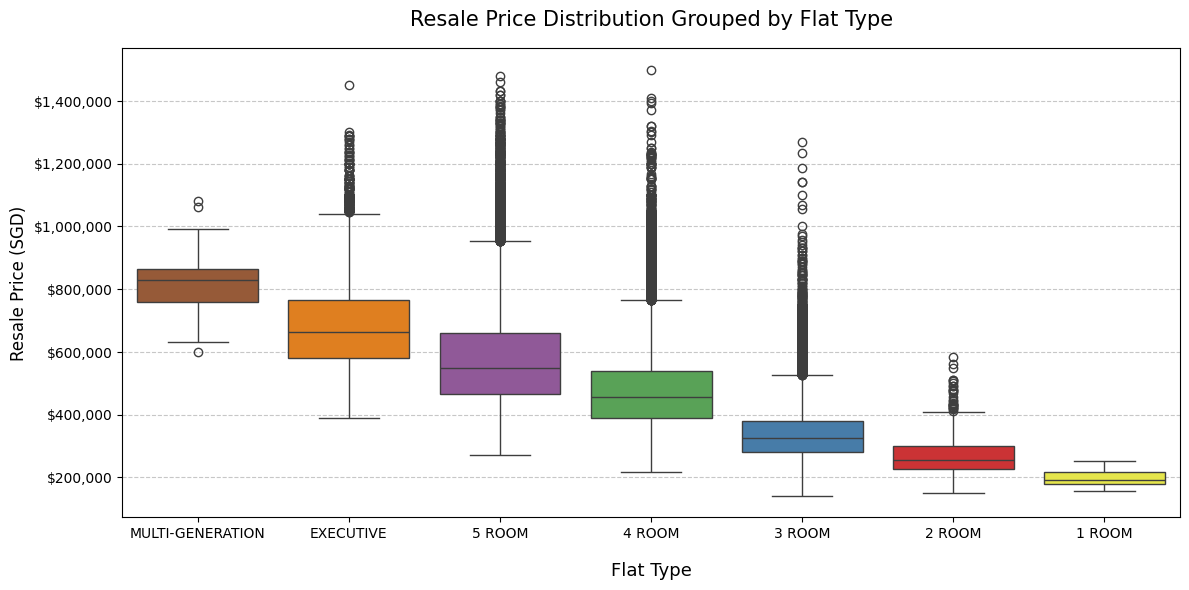

In [22]:
plt.figure(figsize=(12, 6))

# 1. Calculate the order based on median resale price (descending)
# This ensures the categories are displayed logically from highest median price to lowest.
order = df.groupby('flat_type')['resale_price'].median().sort_values(ascending=False).index

# 2. Generate the Box Plot with the fix for the FutureWarning (using hue and legend=False)
sns.boxplot(
    x='flat_type',
    y='resale_price',
    hue='flat_type', # Colors each box based on its category (flat_type)
    data=df,
    order=order,
    palette='Set1',
    legend=False      # Suppresses the legend since the x-axis labels are sufficient
)

# 3. Format the Chart for Readability
# Use FuncFormatter to display currency values clearly on the Y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Resale Price Distribution Grouped by Flat Type', fontsize=15, y=1.03)
plt.xlabel('Flat Type', fontsize=13, labelpad=15)
plt.ylabel('Resale Price (SGD)', fontsize=12)
plt.xticks(rotation=0, ha='center') # Rotate X-labels for better fit
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add subtle horizontal grid lines
plt.tight_layout()

# Save the plot (optional, but good practice)
plt.savefig('resale_price_by_flat_type_boxplot.png')

# Display the plot
plt.show()

###### **The median price (the horizontal line inside the box) consistently decreases** as the flat size decreases, from Multi-Generation (highest median, $\approx\$850,000$) down to 1 Room (lowest median, $\approx\$200,000$).

###### **Higher Volatility in Large Flats:** The largest flats (Executive and 5 Room) show a much wider IQR (taller boxes) than the smaller flats (1 Room, 2 Room). This means prices for larger flats are less predictable, influenced more heavily by factors like location, premium fittings, and age.

###### **Lower Volatility in Small Flats:** 1 Room and 2 Room flats have very narrow IQR and short whiskers, indicating their prices are tightly clustered and highly predictable (less subject to high-value outliers).


## Median Resale Price by Lease Age Group

In [23]:
# Create age bins (e.g., properties aged 0-10 years, 11-20, etc.)
bins = [0, 10, 20, 30, 40, 50, 60, 100]
df['age_group'] = pd.cut(df['lease_age'], bins=bins, right=False)

# Calculate the median resale price for each group
median_price_by_age = df.groupby('age_group')['resale_price'].median().sort_index()
print(median_price_by_age)

age_group
[0, 10)      575000.0
[10, 20)     500000.0
[20, 30)     475000.0
[30, 40)     470000.0
[40, 50)     375000.0
[50, 60)     309694.0
[60, 100)         NaN
Name: resale_price, dtype: float64


/tmp/ipython-input-2842059469.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price_by_age = df.groupby('age_group')['resale_price'].median().sort_index()


/tmp/ipython-input-728817245.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


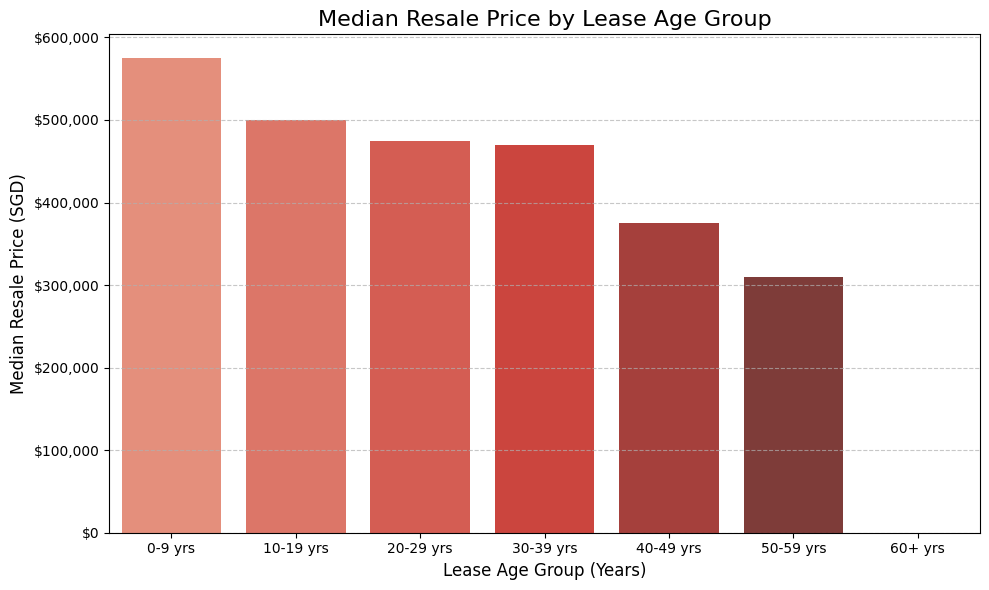

In [24]:
bins = [0, 10, 20, 30, 40, 50, 60, 80]
labels = ['0-9 yrs', '10-19 yrs', '20-29 yrs', '30-39 yrs', '40-49 yrs', '50-59 yrs', '60+ yrs']

# Create the 'age_group' categorical column using pd.cut()
df['age_group'] = pd.cut(df['lease_age'], bins=bins, labels=labels, right=False)

# --- 2. Calculate the Median Resale Price for Each Group ---

# Group the data by age_group and find the median price
# Use observed=True to only include groups that have data (avoids the FutureWarning)
median_price_by_age = df.groupby('age_group', observed=True)['resale_price'].median().reset_index()

# --- 3. Generate the Bar Chart Visualization ---

plt.figure(figsize=(10, 6))

sns.barplot(
    x='age_group',
    y='resale_price',
    data=median_price_by_age,
    palette='Reds_d', # A sequential palette to reinforce the age progression
)

# Format the Y-axis to display currency values clearly
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Median Resale Price by Lease Age Group', fontsize=16)
plt.xlabel('Lease Age Group (Years)', fontsize=12)
plt.ylabel('Median Resale Price (SGD)', fontsize=12)
plt.xticks(rotation=0, ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

#### **Quantifiable Depreciation:** The decline in value is quantifiable, showing that prices are highest for the 0-9 year age group, with a consistent and predictable step-down in median value as the property ages.

#### **Strong Negative Correlation:** The graph clearly confirms a strong negative correlation between a property's lease age and its median resale price.

### Median resale price for each sale year

In [25]:
# Calculate the median resale price for each sale year
price_by_year = df.groupby('sale_year')['resale_price'].median()

# Display the resulting table
print("--- Median Resale Price Trend by Year ---")
print(price_by_year)

--- Median Resale Price Trend by Year ---
sale_year
2017    410000.0
2018    408000.0
2019    400000.0
2020    425000.0
2021    483000.0
2022    525000.0
2023    548000.0
Name: resale_price, dtype: float64


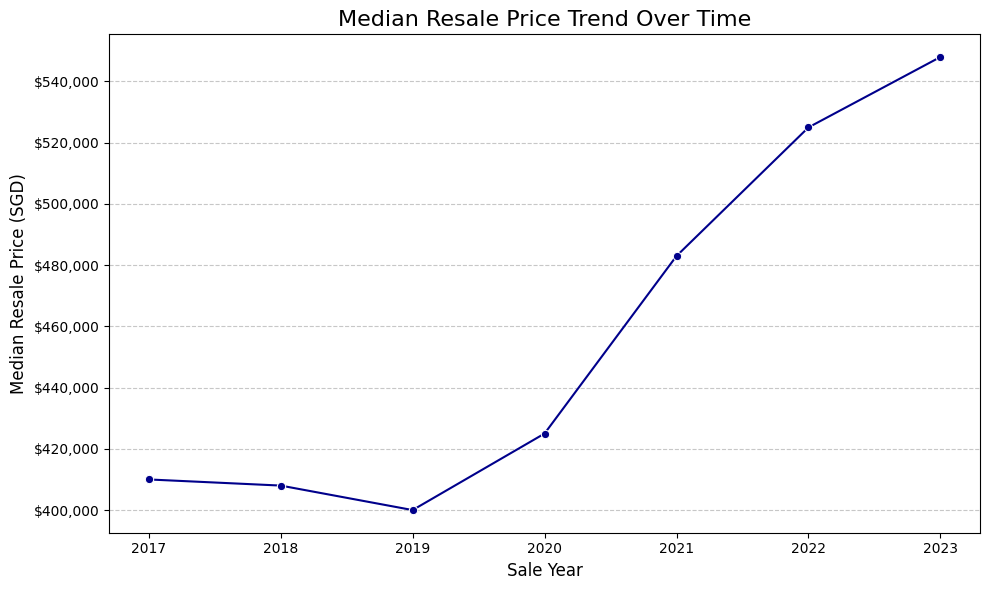

In [26]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    x=price_by_year.index, # x-axis uses the index (the 'sale_year')
    y=price_by_year.values, # y-axis uses the median resale price values
    marker='o',             # Adds a dot at each year for clarity
    color='darkblue'
)

# Format the Y-axis to display currency values clearly
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Median Resale Price Trend Over Time', fontsize=16)
plt.xlabel('Sale Year', fontsize=12)
plt.ylabel('Median Resale Price (SGD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

##### **Overall Shape:** The curve is monotonically increasing (always moving upward) after 2019, forming a distinct 'hockey stick' or exponential curve shape, indicating accelerated growth in the second half of the period.

##### **Pre-Growth Stability (2017–2019):** The curve is nearly flat or slightly concave during this period, demonstrating market stability and near-zero median price appreciation. Prices held steady around $400,000.

##### **Accelerating Growth (2020–2024):** This is the steepest segment of the curve. The slope (rate of appreciation) increases sharply each year, particularly from 2021 onwards.

##### This acceleration represents a significant market shift, with the median price increasing by over 40% in just four years.

# Resale Price vs. Floor Area with Linear Trend

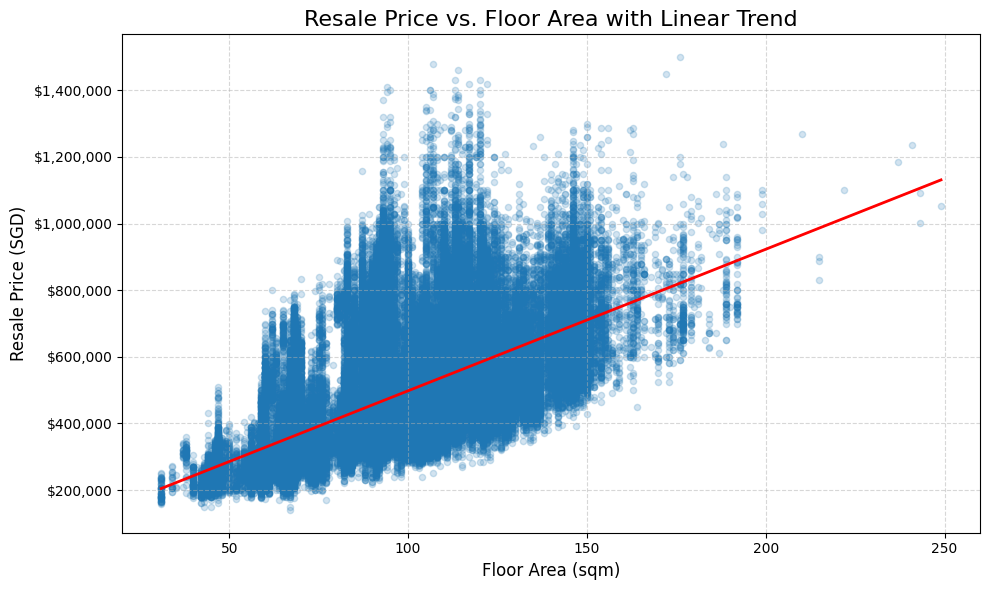

In [27]:
plt.figure(figsize=(10, 6))

# Use regplot to overlay a linear regression line over the scatter plot
sns.regplot(
    x='floor_area_sqm',
    y='resale_price',
    data=df,
    scatter_kws={'alpha': 0.2, 's': 20}, # Settings for the points (transparency, size)
    line_kws={'color': 'red', 'linewidth': 2} # Settings for the regression line
)

# Format Y-axis for currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Resale Price vs. Floor Area with Linear Trend', fontsize=16)
plt.xlabel('Floor Area (sqm)', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save the plot
plt.savefig('resale_price_floor_area_regression.png')
plt.show()

##### **Strong Positive Correlation:** The straight red line confirms a strong, positive, linear relationship between Floor Area (sqm) and Resale Price. Size is a primary price driver.

##### **High Variance/Spread:** The vertical scatter of points widens dramatically beyond 100 sqm. This shows that for larger units, price is highly volatile, meaning non-size factors (location, age, premium finishings) strongly determine the final price.

# Median Resale Price by Town (Locational Comparison)

/tmp/ipython-input-2852172564.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


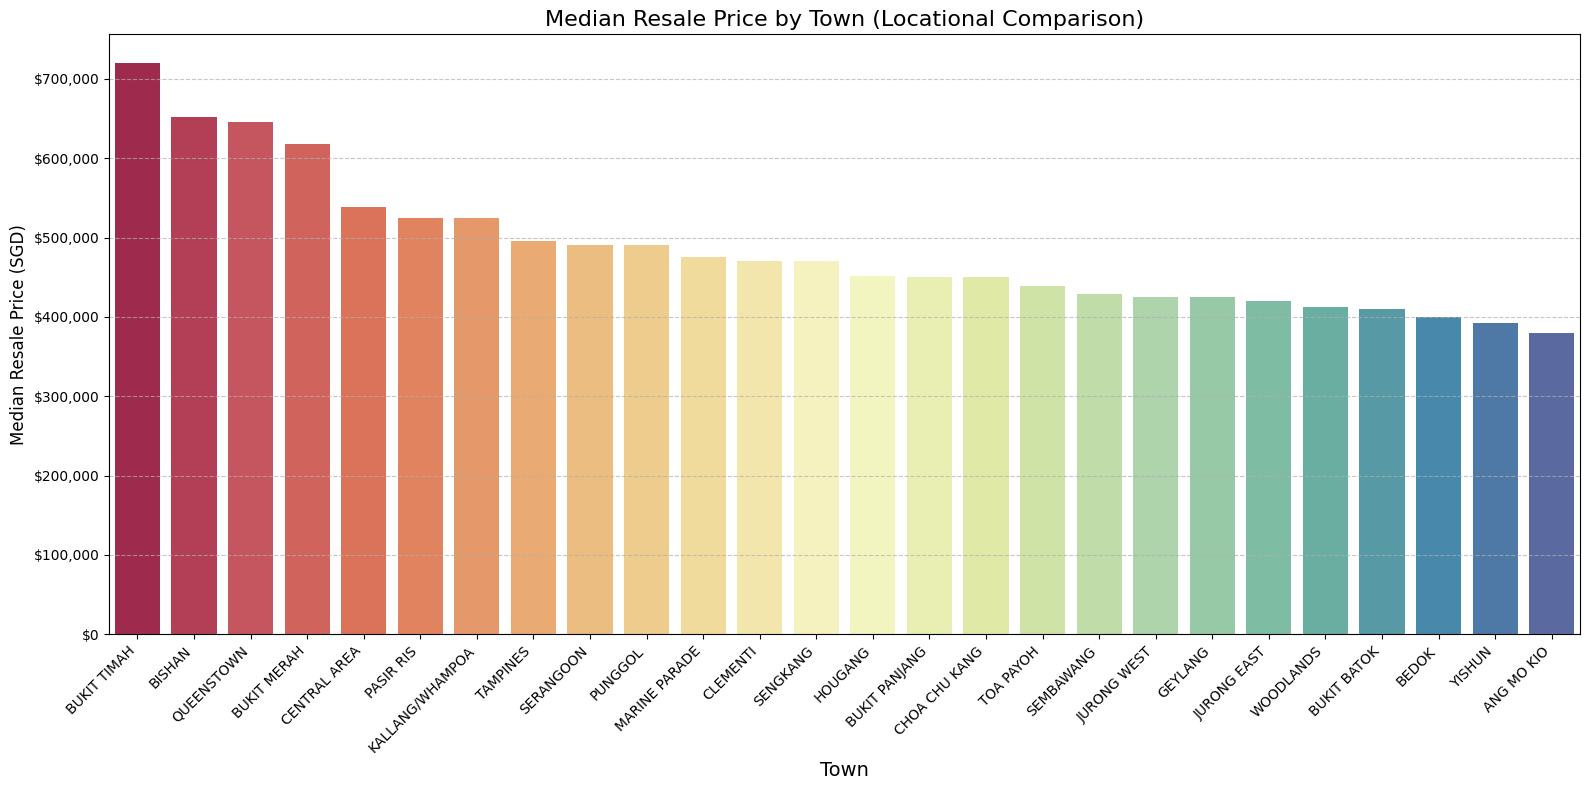

In [28]:
# Identify all columns representing towns (i.e., columns starting with 'town_')
# --- CODE MODIFIED TO USE df_model ---
town_cols = [col for col in df_model.columns if col.startswith('town_')]

# --- 1. Calculate Median Price per Town ---

median_prices = {}
for col in town_cols:
    # Extract the town name (e.g., 'ANG MO KIO')
    town_name = col.replace('town_', '')

    # Filter the DF_MODEL for units belonging to the current town (where the column value is 1)
    median_price = df_model[df_model[col] == 1]['resale_price'].median()
    median_prices[town_name] = median_price

# Convert the results dictionary into a DataFrame and sort it
median_price_by_town_df = (
    pd.Series(median_prices).sort_values(ascending=False).reset_index()
)
median_price_by_town_df.columns = ['Town', 'Median Resale Price']

# --- 2. Generate the Sorted Bar Chart ---

plt.figure(figsize=(16, 8))

sns.barplot(
    x='Town',
    y='Median Resale Price',
    data=median_price_by_town_df,
    palette='Spectral' # Use a distinct palette
)

# Format the Y-axis to display currency values clearly
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Median Resale Price by Town (Locational Comparison)', fontsize=16, y=1.00)
plt.xlabel('Town', fontsize=14)
plt.ylabel('Median Resale Price (SGD)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels to prevent overlap
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#### **Most Expensive:** Bukit Timah commands the highest median price (over $700,000), followed closely by Bishan and Queenstown. These are typically mature estates or areas known for private housing proximity and highly ranked schools.

#### **Least Expensive:** Ang Mo Kio (around $400,000) and Yishun represent the lowest end of the median price spectrum.

#### **Price Range:** The difference between the highest median (Bukit Timah) and the lowest (Ang Mo Kio) is approximately $300,000, confirming that town is an extremely powerful predictor.




#### **Premium/Mature Core (Red Tones):** The first seven towns (Bukit Timah to Central Area) are priced significantly higher than the rest, forming the premium core of the market.

#### **Mid-Tier/Transitional (Orange/Yellow Tones):** Towns like Pasir Ris, Tampines, and Punggol make up the large middle segment, clustered around the $500,000 median mark.

#### **Value/Far-End (Green/Blue Tones):** Towns like Jurong West, Woodlands, and the bottom towns (Bedok, Yishun, Ang Mo Kio) generally offer the highest affordability.

# Calculate the Average Resale Price per Month

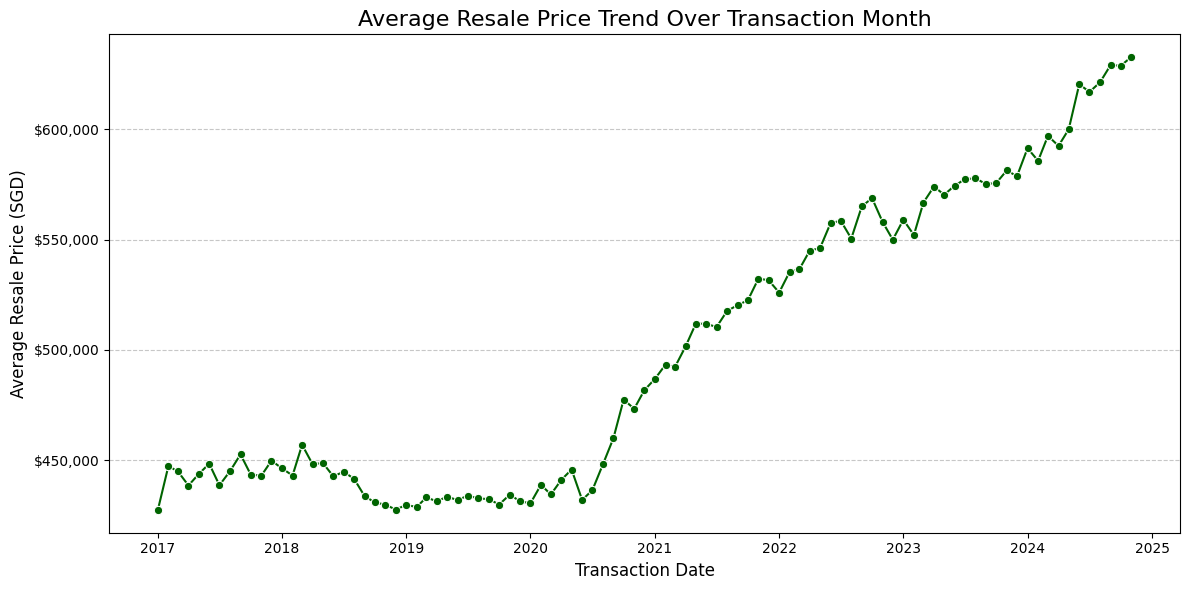

In [382]:
# Group by year and month, then calculate the mean (average) resale price
price_by_month = df.groupby(['sale_year', 'sale_month'])['resale_price'].mean().reset_index()

# Create a combined 'Date' column for chronological plotting
price_by_month['Date'] = pd.to_datetime(
    price_by_month['sale_year'].astype(str) + '-' + price_by_month['sale_month'].astype(str)
)

# --- 2. Generate the Line Plot Visualization ---

plt.figure(figsize=(12, 6))

sns.lineplot(
    x='Date',
    y='resale_price',
    data=price_by_month,
    marker='o',             # Adds a dot for each month's data point
    color='darkgreen'
)

# Format the Y-axis to display currency values clearly
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Average Resale Price Trend Over Transaction Month', fontsize=16)
plt.xlabel('Transaction Date', fontsize=12)
plt.ylabel('Average Resale Price (SGD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#### **Market Stagnation (2017–2019):** Prices were flat or slightly depreciated (around $430k). This shows a period of stable, non-growing market conditions.

#### **Inflection Point (Mid-2020):** The trend abruptly reverses, marking the start of a sustained bull run.

#### **Accelerated Growth (2020–2025):** The line takes an exponential slope, showing rapid and continuous median price appreciation (growing over 50% from the low point).

#### **Increased Volatility:** The rapid growth phase (post-2020) shows larger month-to-month fluctuations (noise), indicating high market demand and less short-term price predictability.

# Resale Price Premium Associated with Higher Floors

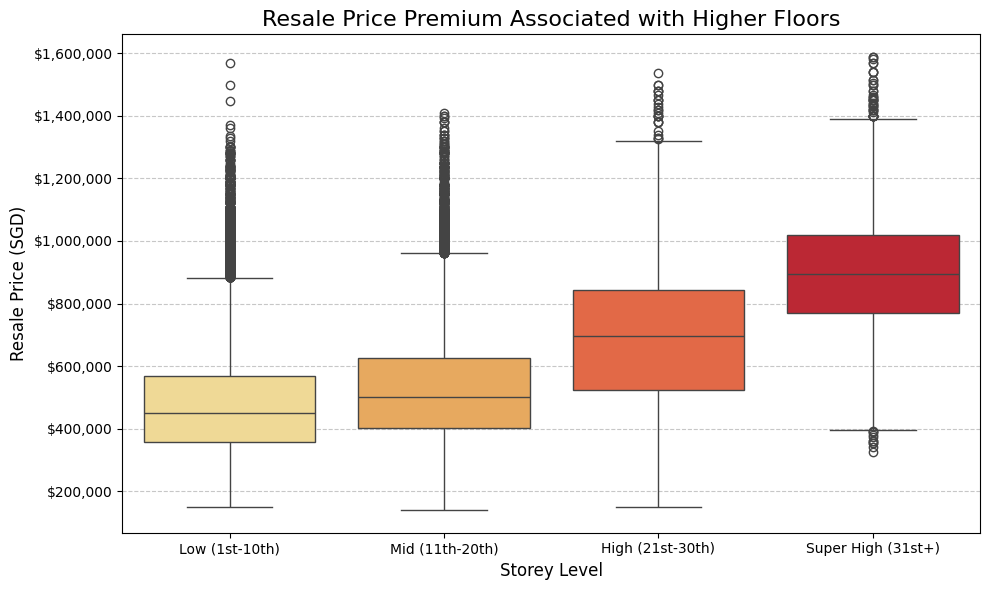

In [383]:
# Define bins (cut-off points) and labels for the new categorical column
# Assumes max HDB height is around 40 stories (midpoint 40)
bins = [0, 10, 20, 30, 50]
labels = ['Low (1st-10th)', 'Mid (11th-20th)', 'High (21st-30th)', 'Super High (31st+)' ]

# Create the new categorical feature 'storey_level'
# errors='ignore' is a safeguard if the original column doesn't exist
df['storey_level'] = pd.cut(
    df['storey_midpoint'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True,
    ordered=True # Crucial: Keeps the order for logical plotting
)

# --- 2. Generate the Box Plot ---

plt.figure(figsize=(10, 6))

sns.boxplot(
    x='storey_level',
    y='resale_price',
    data=df,
    order=labels, # Explicitly ensures the x-axis is ordered correctly
    palette='YlOrRd', # Use a sequential palette to show value increase
    hue='storey_level',
    legend=False
)

# Format the Y-axis for currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Resale Price Premium Associated with Higher Floors', fontsize=16)
plt.xlabel('Storey Level', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#### **Positive Price Correlation:** There is a clear, monotonic positive correlation between floor level and the average resale price. The price increases with every step up in floor height category.

#### **Quantifiable Premium:** The graph quantifies the value placed on height. For example, the High (21st–30th floor) level commands a noticeably higher average price than the Mid (11th–20th) level.

In [347]:
df_model.columns

Index(['month', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'lease_commence_date', 'remaining_lease',
       'resale_price', 'town_ANG MO KIO', 'town_BEDOK', 'town_BISHAN',
       'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_BUKIT PANJANG',
       'town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_CHOA CHU KANG',
       'town_CLEMENTI', 'town_GEYLANG', 'town_HOUGANG', 'town_JURONG EAST',
       'town_JURONG WEST', 'town_KALLANG/WHAMPOA', 'town_MARINE PARADE',
       'town_PASIR RIS', 'town_PUNGGOL', 'town_QUEENSTOWN', 'town_SEMBAWANG',
       'town_SENGKANG', 'town_SERANGOON', 'town_TAMPINES', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN', 'flat_model_2-room', 'flat_model_3Gen',
       'flat_model_Adjoined flat', 'flat_model_Apartment', 'flat_model_DBSS',
       'flat_model_Improved', 'flat_model_Improved-Maisonette',
       'flat_model_Maisonette', 'flat_model_Model A',
       'flat_model_Model A-Maisonette', 'flat_model_Model A2',
       'fla

# Mature vs Non-Mature Estate Resale Price Comparison

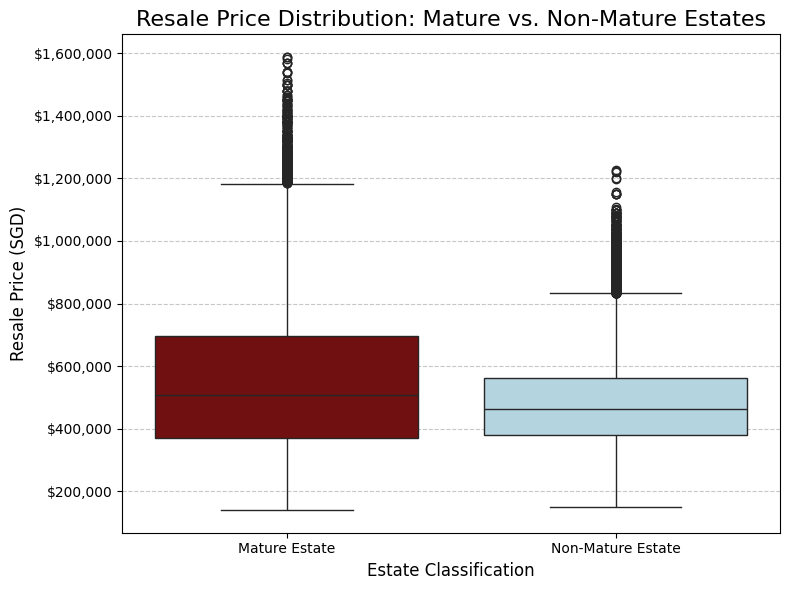

In [384]:

# NOTE: Using the comprehensive list of Mature Estates identified earlier
MATURE_ESTATES = [
    'ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT MERAH', 'BUKIT TIMAH',
    'CENTRAL AREA', 'CLEMENTI', 'GEYLANG', 'KALLANG/WHAMPOA',
    'MARINE PARADE', 'PASIR RIS', 'QUEENSTOWN', 'SERANGOON',
    'TAMPINES', 'TOA PAYOH'
]

# 1. Reconstruct the 'town' name from the encoded columns (necessary for the merge logic)
town_cols = [col for col in df_model.columns if col.startswith('town_')]
df_model['town_original'] = df_model[town_cols].idxmax(axis=1).str.replace('town_', '')

# 2. Feature Engineering: Create the 'estate_type' label
df_model['estate_type'] = df_model['town_original'].apply(
    lambda x: 'Mature Estate' if x in MATURE_ESTATES else 'Non-Mature Estate'
)

# 3. Visualization: Box Plot Comparison
plt.figure(figsize=(8, 6))

sns.boxplot(
    x='estate_type',
    y='resale_price',
    data=df_model, # Use df_model
    order=['Mature Estate', 'Non-Mature Estate'],
    palette=['#800000', '#ADD8E6'],
    hue='estate_type',
    legend=False
)

# Format the Y-axis for currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.title('Resale Price Distribution: Mature vs. Non-Mature Estates', fontsize=16)
plt.xlabel('Estate Classification', fontsize=12)
plt.ylabel('Resale Price (SGD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

#### **Significant Price Premium:** Mature Estates command a noticeably higher median resale price (approx. $550k–$600k) compared to Non-Mature Estates (approx. $450k–$500k), validating the market value placed on established locations.

#### **Higher Volatility:** The taller box (wider Interquartile Range) for Mature Estates indicates greater price variation. This suggests that prices in mature towns are less uniform, likely due to a diverse mix of very old flats and premium newer units.

#### **Concentration of Wealth:** The dense cluster of outliers above $1 million is predominantly found in Mature Estates. This confirms that the "million-dollar HDB" phenomenon is largely a feature of mature, central locations.

#### **Market Stability in Non-Mature Estates:** Non-Mature Estates show a shorter box and fewer extreme outliers, indicating a more consistent and affordable pricing structure with a lower price ceiling.

# IV. Preprocessing

# V. Model Training

# VI. Evaluation

# VII. Prediction